In [165]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

## Magnetic Field Numerical Tracking Exercise
I'm going to take a particle initially moving with some $\textbf{v}$, then see how it behaves in three different cases:

- Case 1 : $\textbf{B} = B_0 \hat{z}$ and $\textbf{E} = 0$
- Case 2 : $\textbf{B} = B_0 \hat{z}$ and $\textbf{E} = E_0\hat{z}$
- Case 3 : $\textbf{B} = B_0 \hat{z}$ and $\textbf{E} = E_0\hat{x}$

Then, I'll do the same thing relativistically.

### Analytical Solution
When solving the DE for the Lorentz Force in case 1,

$$
m\dot{\textbf{v}} = q(\textbf{v} \times \textbf{B}) = q
\begin{vmatrix}
\hat{x} && \hat{y} && \hat{z} \\
v_x && v_y && v_z \\
0 && 0 && B_z
\end{vmatrix} = q(v_yB_z \hat{x} - v_x B_z \hat{y})
$$
We can get two equations of motion for $\textbf{v}_x$ and $\textbf{v}_y$

$$
\dot{\textbf{v}}_x = \frac{qB_z}{m}v_y \hat{x} = \omega v_y \hat{x}
$$
$$
\dot{\textbf{v}}_y = \frac{qB_z}{m}v_x \hat{y} = \omega v_x \hat{y}
$$
where $\omega$ is the cyclotron frequency $qB/m$. Taking the derivative of one and plugging it into the other shows that these equations are SHM:
$$
\boxed{\ddot{\textbf{v}}_y = - \omega^2 v_y \hat{y}} \qquad \boxed{\ddot{\textbf{v}}_x = - \omega^2 v_x \hat{x}}
$$
So, solutions involving a linear combination of sines and cosines can be applied to this case:
$$
\boxed{y = A\sin(\omega t) + B\cos(\omega t)} \qquad \boxed{x = A\sin(\omega t) + B\cos(\omega t)}
$$
This is how I'll get the analytical solutions that I want.

### Numerical Solutions
Effectively, Im solving the equation

$$
\dot{
    \begin{bmatrix}
    v_x \\
    v_y
    \end{bmatrix}
} = \frac{qB}{m} 
    \begin{bmatrix}
    0 && 1 \\
    -1 && 0
    \end{bmatrix}
    \begin{bmatrix}
    v_x \\
    v_y
    \end{bmatrix}
    =\omega
    \begin{bmatrix}
    0 && 1 \\
    -1 && 0
    \end{bmatrix}
    \begin{bmatrix}
    v_x \\
    v_y
    \end{bmatrix}
$$
Using an Explicit & Implicit Euler's Method, then 4th Order Runge-Kutta

# Case 1
$\textbf{B} = B_0 \hat{z}$ \
$\textbf{E} = 0$


In [166]:
### Constants
B_0 = 2           # Strength of B Field
E_0 = 3           # Strength of E Field
q = 1             # charge of particle
m = 1             # mass of particle
omega_0 = q*B_0/m # Cyclotron Frequency (1/s)
sim_len = 50      # Simulation Length
dt   = 0.05       # timestep, Notice that larger timesteps are more error bound.

### Explicit (Forward) Euler

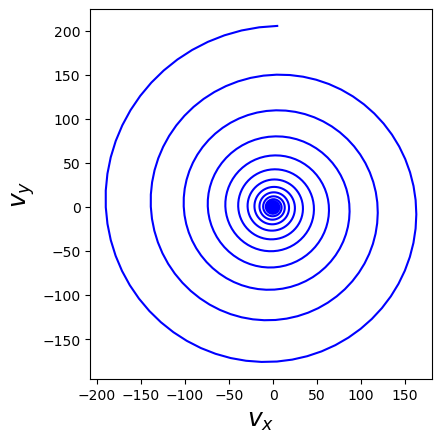

In [167]:
### Initial Conditions
v_y  = [1]        # y velocity of Particle
v_x  = [1]        # x velocity of Particle
a_y  = [0]        # y accel of Particle
a_x  = [0]        # x accel of Particle
t    = [0]        # timer
omega_0 = q*B_0/m # Cyclotron Frequency (1/s)

### Perform the Forward(Explicit) Euler Algorithm for 50 seconds
while t[-1] < sim_len:
    # I can use omega_0 because B is constant here.
    a_y.append(-omega_0 * v_x[-1])
    a_x.append(omega_0 * v_y[-1])
    v_y.append(v_y[-1] + a_y[-1] * dt)
    v_x.append(v_x[-1] + a_x[-1] * dt)
    t.append(t[-1] + dt) # step the algo

### Compare the velocites against each other
plt.plot(v_x, v_y,'b-',label='y(t)')
plt.xlabel('$v_x$',fontsize = 18)
plt.ylabel('$v_y$',fontsize = 18)
plt.gca().set_aspect('equal')
plt.show()

### Implicit (Backward) Euler
Rewriting the diff. eq I am trying to solve
$$
\dot{
    \begin{bmatrix}
    v_x \\
    v_y
    \end{bmatrix}
} = \frac{qB}{m}
    \begin{bmatrix}
    0 && 1 \\
    -1 && 0
    \end{bmatrix}
    \begin{bmatrix}
    v_x \\
    v_y
    \end{bmatrix}
    =\omega
    \begin{bmatrix}
    0 && 1 \\
    -1 && 0
    \end{bmatrix}
    \begin{bmatrix}
    v_x \\
    v_y
    \end{bmatrix}
$$
as
$$
\dot{v} = A v
$$
where
$$
A = \begin{bmatrix}
0 && -\omega \\
\omega && 0
\end{bmatrix}.
$$

The Implicit Euler algorithm is defined by
$$
\frac{\textbf{v}^{n+1} - \textbf{v}^n}{\text{dt}} = A\textbf{v}^{n+1}
$$
which can be analytically solved by doing
$$
\left[ I_2-A \text{dt}\right]\textbf{v}^{n+1} = \textbf{v}^n \longrightarrow \textbf{v}^{n+1} = M \textbf{v}^n
$$
where
$$
M = \left(I_2 - A\text{dt}\right)^{-1}
$$
and $I_2$ is the 2x2 identity matrix.

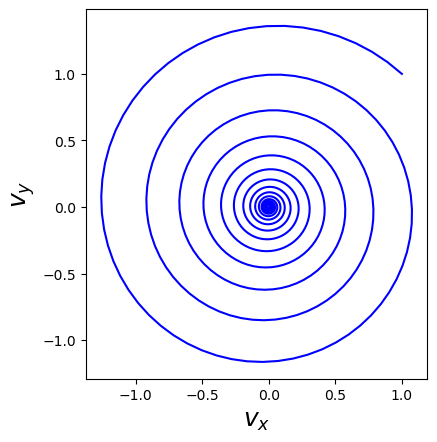

In [168]:
### Attempting to do this the matrix way, so I can get a better understanding of the method
N = int(sim_len/dt) # number of points
t = np.linspace(0, sim_len, N+1).reshape((N+1,1)) # time grid

# Create the matrices used for the equation
A = np.array([[0,-omega_0],[omega_0,0]])
M = np.linalg.inv(np.identity(2) - A * dt)

v = np.zeros((N+1,2))    # Initialize v array
v[0] = [1,1]             # Initial Condition

# perform all of the dot products
for i in range(N):
    v[i+1] = np.dot(M,v[i])

### Show the velocities against each other
plt.plot(v[:,0], v[:,1],'b-',label='y(t)')
plt.xlabel('$v_x$',fontsize = 18)
plt.ylabel('$v_y$',fontsize = 18)
plt.gca().set_aspect('equal')
plt.show()

I am not too confident in this one, as it doesn't seem to conserve energy as it spirals in. Though, it doesn't exponentially blow up so maybe this is the effect that I should be seeing?

### Runge-Kutta (RK4)
From what I can understand, the RK4 is defined by
$$
\textbf{v}^{n+1} = \textbf{v}^n + \frac{1}{6}\left(k_1 + 2k_2 + 2k_3 + k_4\right)\text{dt}
$$
where
$$
k_1 = A \textbf{v}^n
$$
$$
k_2 = A \left(\textbf{v}^n +  \frac{k_1}{2}\, \text{dt}\right)
$$
$$
k_3 = A \left(\textbf{v}^n + \frac{k_2}{2}\,\text{dt}\right)
$$
$$
k_3 = A \left(\textbf{v}^n + k_3\,\text{dt}\right)
$$

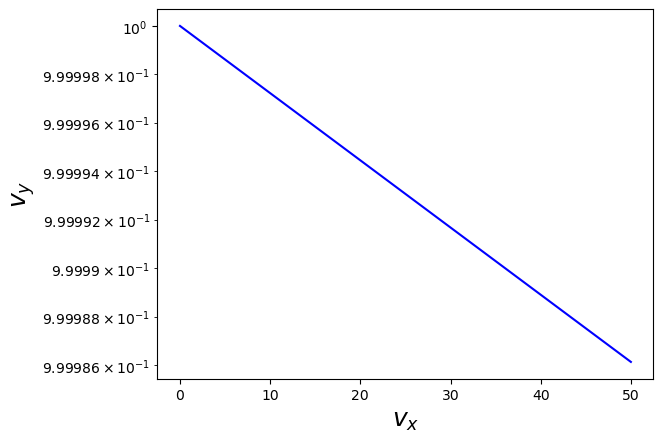

In [169]:
### RK4 attempt
### Attempting to do this the matrix way, so I can get a better understanding of the method
N = int(sim_len/dt) # number of points
t = np.linspace(0, sim_len, N+1).reshape((N+1,1)) # time grid

# Create the matrix used for the equation
A = np.array([[0,-omega_0],[omega_0,0]])

v = np.zeros((N+1,2))    # Initialize v array
v[0] = [1,1]             # Initial Condition

for i in range(N):
    ## compute the four k values
    k_1 = np.matmul(A, v[i])
    # this adds the timestep to both indices of the vector
    # wanted to clarify as vector + scalar is not well defined
    k_2 = np.matmul(A, v[i] + k_1 * dt/2)
    k_3 = np.matmul(A, v[i] + k_2 * dt/2)
    k_4 = np.matmul(A, v[i] + k_3 * dt)

    ## get the next value
    v[i+1] = v[i] + (k_1 + 2*k_2 + 2*k_3 + k_4) * dt/6

### Show the velocities against each other
plt.semilogy(t, 0.5 * np.linalg.norm(v, axis=1)**2,'b-',label='y(t)')
plt.xlabel('$v_x$',fontsize = 18)
plt.ylabel('$v_y$',fontsize = 18)
plt.show()

This does seem to conserve energy properly, so I am a bit more confident in how I implemented this. Though, if I have a timestep that is too large over long time frames, it spirals inward like the implicit Euler.

# Case 2
$\textbf{B} = B_0 \hat{z}$\
$\textbf{E} = E_0 \hat{z}$

This one (along with case 3) doesn't really change my implementations much- all I have do to is add in an $\textbf{E}$ field term into how I'm updating my velocity.

### Explicit (Forward) Euler

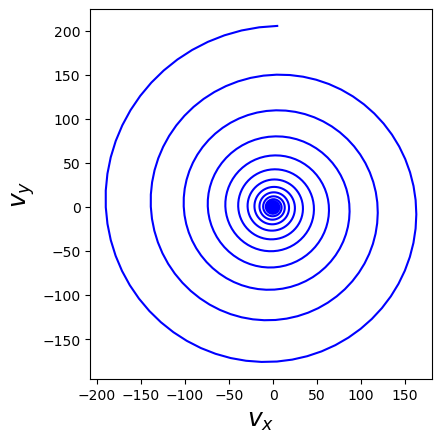

In [170]:
### Initial Conditions
v_x  = [1]        # x velocity of Particle
v_y  = [1]        # y velocity of Particle
v_z  = [0]        # z velocity of Particle
a_x  = [0]        # x accel of Particle
a_y  = [0]        # y accel of Particle
a_z  = [0]        # z accel of Particle
t    = [0]        # timer

### Perform the Forward(Explicit) Euler Algorithm for 50 seconds
while t[-1] < sim_len:
    # I can use omega_0 because B is constant here.
    a_x.append(omega_0 * v_y[-1])
    a_y.append(-omega_0 * v_x[-1])
    a_z.append(q * E_0 / m)

    v_x.append(v_x[-1] + a_x[-1] * dt)
    v_y.append(v_y[-1] + a_y[-1] * dt)
    v_z.append(v_z[-1] + a_z[-1] * dt)

    t.append(t[-1] + dt) # step the algo

### Compare the velocites against each other
plt.plot(v_x, v_y,'b-',label='y(t)')
plt.xlabel('$v_x$',fontsize = 18)
plt.ylabel('$v_y$',fontsize = 18)
plt.gca().set_aspect('equal')
plt.show()

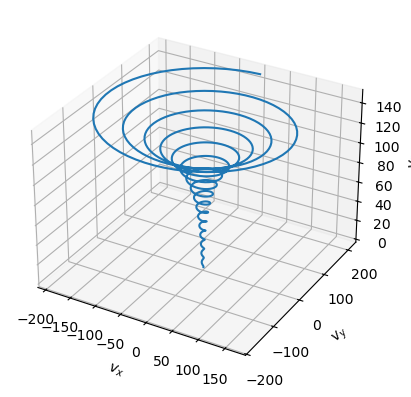

In [171]:
### also do a 3d plot so we can see the particle moving
ax = plt.figure().add_subplot(projection='3d')
ax.plot(v_x, v_y, v_z, label='particle velocity')
ax.set_xlabel('$v_x$')
ax.set_ylabel('$v_y$')
ax.set_zlabel('$v_z$')
plt.show()

### Implicit (Backward) Euler

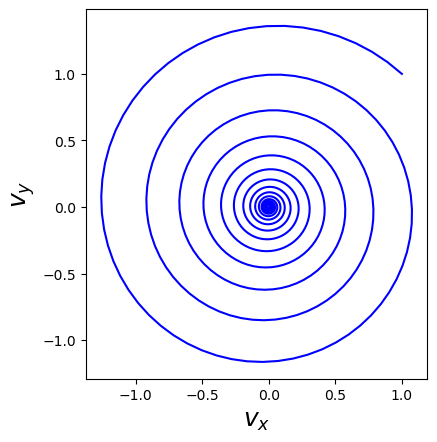

In [172]:
N = int(sim_len/dt) # number of points
t = np.linspace(0, sim_len, N+1).reshape((N+1,1)) # time grid

# Create the matrices used for the equation
A = np.array([[0,-omega_0],[omega_0,0]])
M = np.linalg.inv(np.identity(2) - A * dt)

v = np.zeros((N+1,3))    # Initialize v array
v[0] = [1,1,0]             # Initial Condition

# perform all of the dot products
for i in range(N):
    # this handles the x-y motion, which is affected by the b field
    v[i+1][0:2] = np.dot(M,v[i][0:2])
    # handle the z motion, which is affected by the e field
    v[i+1][2] = v[i][2] + (q * E_0 / m) * dt

### Show the velocities against each other
plt.plot(v[:,0], v[:,1],'b-',label='y(t)')
plt.xlabel('$v_x$',fontsize = 18)
plt.ylabel('$v_y$',fontsize = 18)
plt.gca().set_aspect('equal')
plt.show()

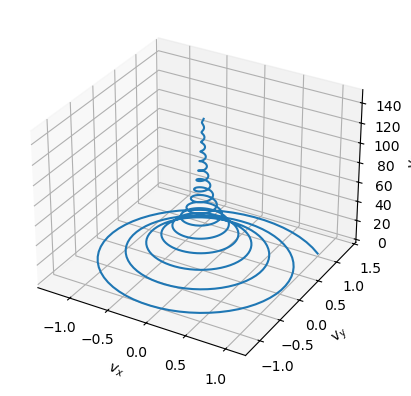

In [173]:
### also do a 3d plot so we can see the particle moving
ax = plt.figure().add_subplot(projection='3d')
ax.plot(v[:,0], v[:,1], v[:,2], label='particle velocity')
ax.set_xlabel('$v_x$')
ax.set_ylabel('$v_y$')
ax.set_zlabel('$v_z$')
plt.show()

### Runge-Kutta (RK4)

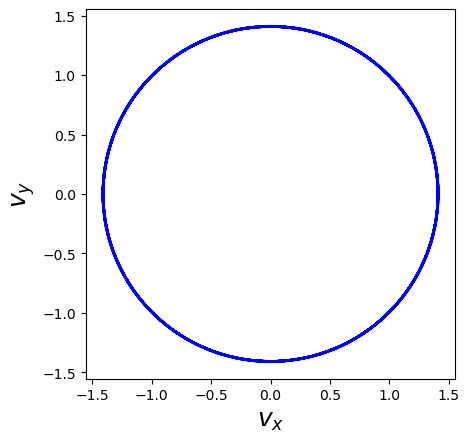

In [174]:
### RK4 attempt
dt = 0.1
### Attempting to do this the matrix way, so I can get a better understanding of the method
N = int(sim_len/dt) # number of points
t = np.linspace(0, sim_len, N+1).reshape((N+1,1)) # time grid

# Create the matrix used for the equation
A = np.array([[0,-omega_0],[omega_0,0]])

v = np.zeros((N+1,3))    # Initialize v array
v[0] = [1,1,0]           # Initial Condition

for i in range(N):
    ## compute the four k values
    k_1 = np.matmul(A, v[i][0:2])
    # this adds the timestep to both indices of the vector
    # wanted to clarify as vector + scalar is not well defined
    k_2 = np.matmul(A, v[i][0:2] + k_1 * dt/2)
    k_3 = np.matmul(A, v[i][0:2] + k_2 * dt/2)
    k_4 = np.matmul(A, v[i][0:2] + k_3 * dt)

    ## get the next value for updating x and y
    v[i+1][0:2] = v[i][0:2] + (k_1 + 2*k_2 + 2*k_3 + k_4) * dt/6

    # update the z based on the e field
    v[i+1][2] = v[i][2] + (q * E_0 / m) * dt


### Show the velocities against each other
plt.plot(v[:,0], v[:,1],'b-',label='y(t)')
plt.xlabel('$v_x$',fontsize = 18)
plt.ylabel('$v_y$',fontsize = 18)
plt.gca().set_aspect('equal')
plt.show()

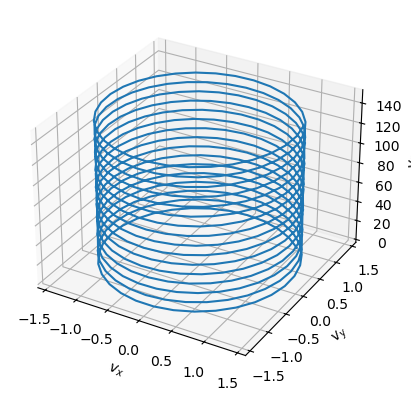

In [175]:
### also do a 3d plot so we can see the particle moving
ax = plt.figure().add_subplot(projection='3d')
ax.plot(v[:,0], v[:,1], v[:,2], label='particle velocity')
ax.set_xlabel('$v_x$')
ax.set_ylabel('$v_y$')
ax.set_zlabel('$v_z$')
plt.show()

# Case 3
$\textbf{B} = B_0 \hat{z}$\
$\textbf{E} = E_0 \hat{x}$

Just going to be adding an E contribution into the x direction- this shouldn't be too difficult.

### Explicit (Forward) Euler

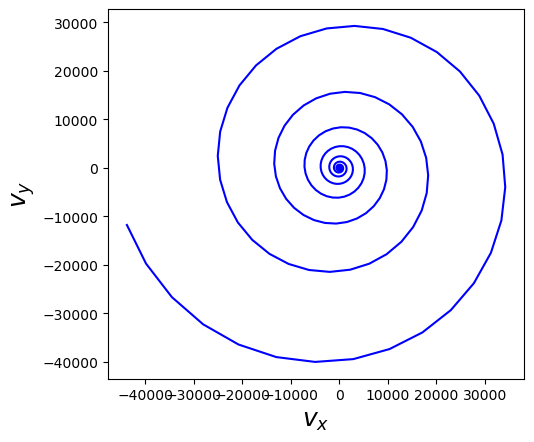

In [176]:
### Initial Conditions
x    = [0]          # x position of Particle
y    = [0]          # y position of Particle
v_y  = [1]          # y velocity of Particle
v_x  = [0]          # x velocity of Particle
a_y  = [0]          # y accel of Particle
a_x  = [0]          # x accel of Particle
t    = [0]          # timer
omega_0 = q*B_0/m   # Cyclotron Frequency (1/s)

### Perform the Forward(Explicit) Euler Algorithm for 50 seconds
while t[-1] < sim_len:
    # I can use omega_0 because B is constant here.
    a_y.append(-omega_0 * v_x[-1])
    # adding in the Coulomb Force into this
    a_x.append(omega_0 * v_y[-1] + (q * E_0 / m))
    v_y.append(v_y[-1] + a_y[-1] * dt)
    v_x.append(v_x[-1] + a_x[-1] * dt)
    x.append(x[-1] + v_x[-1] * dt)
    y.append(y[-1] + v_y[-1] * dt)
    t.append(t[-1] + dt) # step the algo

### Compare the velocites against each other
plt.plot(v_x, v_y,'b-',label='y(t)')
plt.xlabel('$v_x$',fontsize = 18)
plt.ylabel('$v_y$',fontsize = 18)
plt.gca().set_aspect('equal')
plt.show()

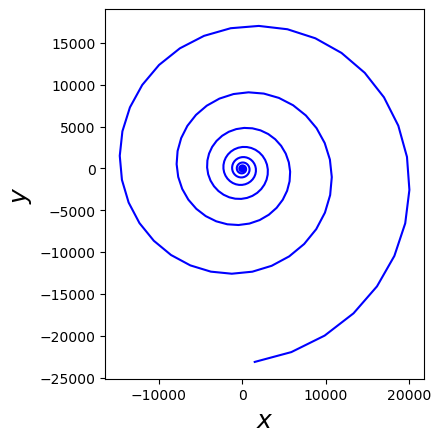

In [177]:
### Compare the positions against each other
plt.plot(x, y,'b-',label='y(t)')
plt.xlabel('$x$',fontsize = 18)
plt.ylabel('$y$',fontsize = 18)
plt.gca().set_aspect('equal')
plt.show()

This seems OK, but the direction the particle seems to be going is not intuitive. The E field is going in the $x$ direction, so why is the particle accelerating in the $-y$ direction?

### Implicit (Backward) Euler

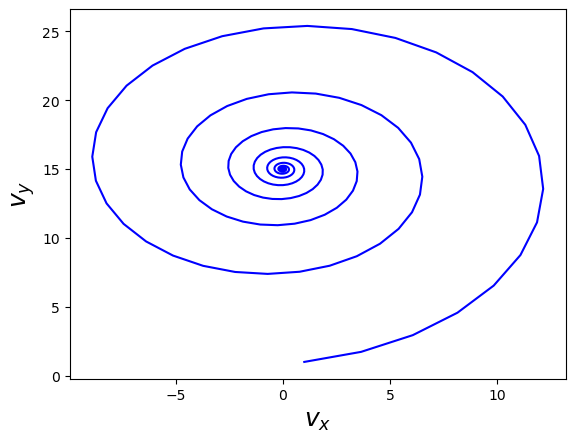

In [178]:
N = int(sim_len/dt) # number of points
t = np.linspace(0, sim_len, N+1).reshape((N+1,1)) # time grid

# Create the matrices used for the equation
A = np.array([[0,-omega_0],[omega_0,0]])
M = np.linalg.inv(np.identity(2) - A * dt)

# Initialize velocity, position, and forcing arrays
v = np.zeros((N+1,2))
r = np.zeros((N+1,2))
f = np.array((q*E_0/m, 0))

# Initial Conditions
v[0] = [1,1]
r[0] = [0,0]

# perform all of the dot products
for i in range(N):
    # handle the changes in motion due to fields
    v[i+1] = np.dot(M,v[i]+f)
    # step position
    r[i+1] = r[i] + v[i+1] * dt


### Show the velocities against each other
plt.plot(v[:,0], v[:,1],'b-',label='y(t)')
plt.xlabel('$v_x$',fontsize = 18)
plt.ylabel('$v_y$',fontsize = 18)
plt.show()

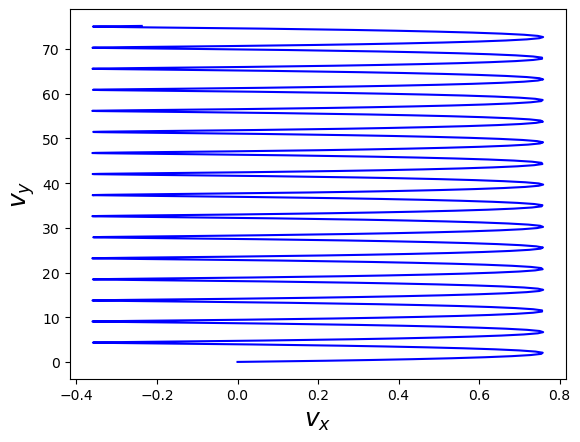

In [184]:
### Show the positions against each other
plt.plot(r[:,0], r[:,1],'b-',label='y(t)')
plt.xlabel('$v_x$',fontsize = 18)
plt.ylabel('$v_y$',fontsize = 18)
plt.show()

### Runge-Kutta (RK4)

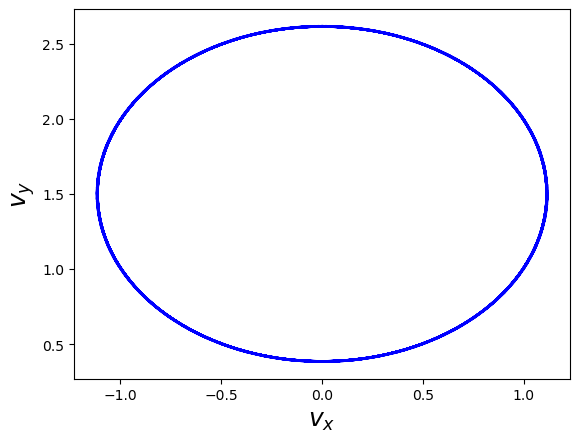

In [180]:
### RK4 attempt
### Attempting to do this the matrix way, so I can get a better understanding of the method
N = int(sim_len/dt) # number of points
t = np.linspace(0, sim_len, N+1).reshape((N+1,1)) # time grid

# Create the matrix used for the equation
A = np.array([[0,-omega_0],[omega_0,0]])

v = np.zeros((N+1,2))    # Initialize v array
r = np.zeros((N+1,2))    # Initialize pos array
f = np.array((q*E_0/m, 0)) #init force vec

v[0] = [1,1]             # Initial Condition
r[0] = [0,0]             # Initial Condition

for i in range(N):
    ## compute the four k values
    k_1 = np.matmul(A, v[i]) + f
    # this adds the timestep to both indices of the vector
    # wanted to clarify as vector + scalar is not well defined
    k_2 = np.matmul(A, v[i] + k_1 * dt/2) + f
    k_3 = np.matmul(A, v[i] + k_2 * dt/2) + f
    k_4 = np.matmul(A, v[i] + k_3 * dt) + f

    ## get the next value
    v[i+1] = v[i] + (k_1 + 2*k_2 + 2*k_3 + k_4) * dt/6
    r[i+1] = r[i] + dt * v[i+1]

### Show the velocities against each other
plt.plot(v[:,0], v[:,1],'b-',label='y(t)')
plt.xlabel('$v_x$',fontsize = 18)
plt.ylabel('$v_y$',fontsize = 18)
plt.show()

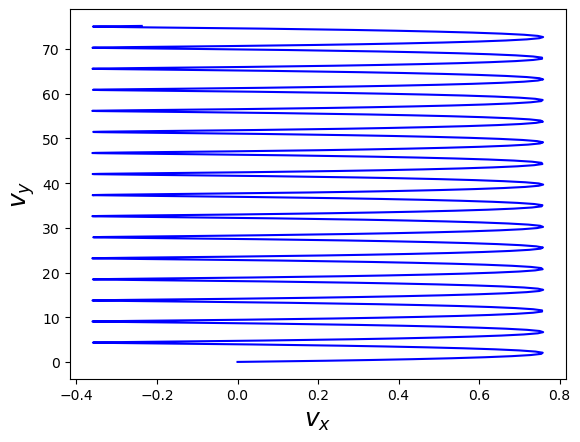

In [181]:
### Show the positions against each other
plt.plot(r[:,0], r[:,1],'b-',label='y(t)')
plt.xlabel('$v_x$',fontsize = 18)
plt.ylabel('$v_y$',fontsize = 18)
plt.show()